## Main Goals: 
Conduct EDA on our cleaned job data to 
- build data profile tables and plots  
- explore data relationships  
- identify features

## 1. Imports packages and load the data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
jobs = pd.read_csv('data/job_data_cleaned.csv')

In [3]:
print(jobs.info())
print('There are {} observations and {} features in this dataset.'.format(jobs.shape[0],jobs.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Description    2088 non-null   object 
 1   Rating             1980 non-null   float64
 2   Company Name       2088 non-null   object 
 3   Location           2088 non-null   object 
 4   Size               2047 non-null   object 
 5   Type of ownership  2073 non-null   object 
 6   Industry           1899 non-null   object 
 7   Sector             1899 non-null   object 
 8   Revenue            1474 non-null   object 
 9   Years Founded      1592 non-null   float64
 10  Min_Salary         2088 non-null   int64  
 11  Max_Salary         2088 non-null   int64  
 12  Seniority          2088 non-null   object 
 13  HQ_Same            2088 non-null   int64  
 14  SQL                2088 non-null   int64  
 15  Excel              2088 non-null   int64  
 16  Python             2088 

In [4]:
jobs.head(3)

,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary,Max_Salary,Seniority,HQ_Same,SQL,Excel,Python,Tableau,R,SAS
0,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,NY,201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),59.0,37,66,Not specified,1,1,0,1,0,1,0
1,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,NY,10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),127.0,37,66,Not specified,1,1,1,0,0,1,1
2,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,NY,1001 to 5000 employees,Company - Private,Internet,Information Technology,NaN,17.0,37,66,Senior,1,1,1,0,1,0,0


## 2. Explore the data

### 2.1 DATA PROFILES — PLOTS AND TABLES

#### Numerical features

Let's first see the summary table for our numerical features.

In [5]:
jobs.describe()

,Rating,Years Founded,Min_Salary,Max_Salary,HQ_Same,SQL,Excel,Python,Tableau,R,SAS
count,1980.000000,1592.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,3.731566,41.534548,54.172414,89.875479,0.453065,0.588123,0.394157,0.270115,0.268678,0.175287,0.147510
std,0.670333,47.334203,19.545825,29.410448,0.497911,0.492291,0.488786,0.444125,0.443378,0.380304,0.354698
min,1.000000,1.000000,24.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,14.000000,41.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,23.000000,50.000000,87.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,50.000000,63.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,322.000000,113.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


And let's see what the distributions look like.

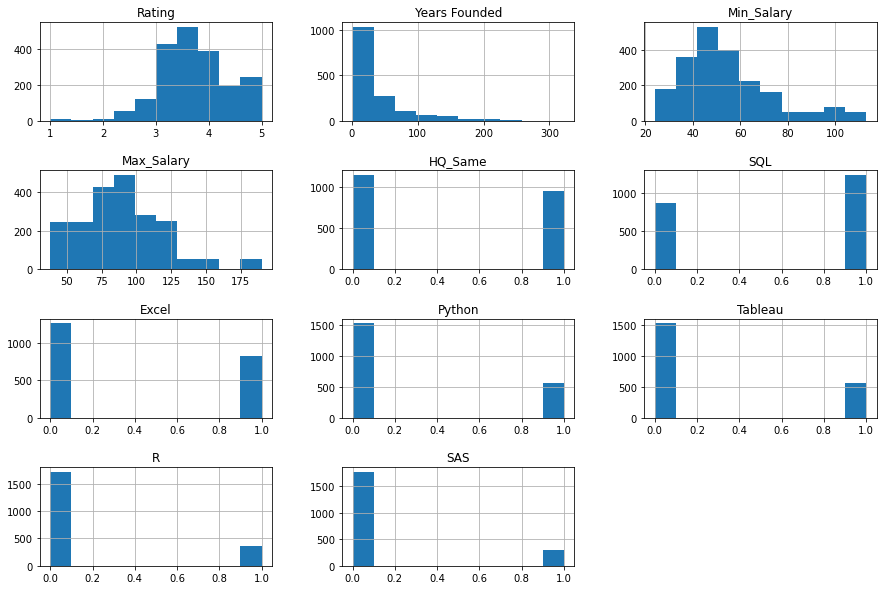

In [6]:
jobs.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

We can see from the distributions above that neither of our targets, Min_Salary and Max_Salary, is normally distributed, and they both have long right tails.  
In terms of skills required, SQL is the only skill that is required by more than 50% of the jobs. 39% of the jobs require experience in Excel, and 27% of the jobs require knowledge in Python.

#### categorical features

In [7]:
#select categorical variables only
df_cat = jobs.select_dtypes(include = 'object').copy()

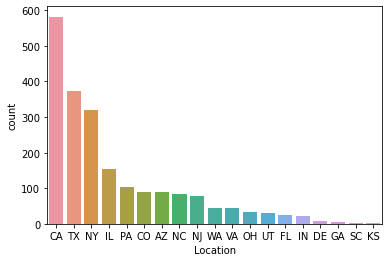

In [8]:
#count plot for 'Location'
location_counts = sns.countplot(x = 'Location', data = df_cat, order = df_cat.Location.value_counts().index)
plt.show()

Seems like there is a great demand for data analysts in the state of California.

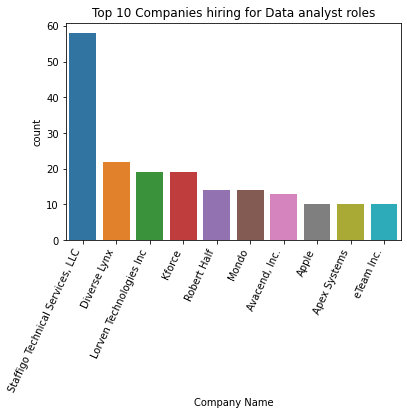

In [9]:
# count plot for 10 of the 'Company Name' that appear the most frequent 
coName_counts = sns.countplot(x = 'Company Name', data = df_cat, 
                              order = df_cat['Company Name'].value_counts().head(10).index)
coName_counts.set_xticklabels(coName_counts.get_xticklabels(), rotation = 65, horizontalalignment='right')
plt.title('Top 10 Companies hiring for Data analyst roles')
plt.show()

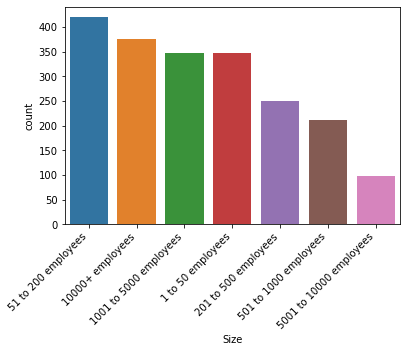

In [10]:
# count plot for 'Size'
size_counts = sns.countplot(x = 'Size', data = df_cat, order = df_cat.Size.value_counts().index)
size_counts = size_counts.set_xticklabels(size_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

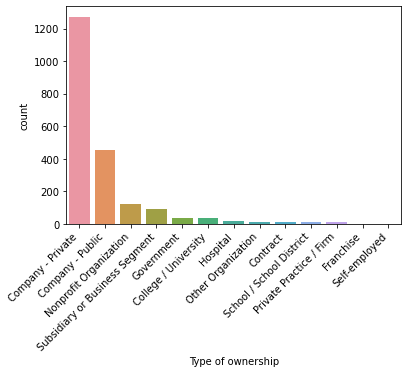

In [11]:
# count plot for 'Type of ownership'
ownership_counts = sns.countplot(x = 'Type of ownership', data = df_cat, order = df_cat['Type of ownership'].value_counts().index)
ownership_counts = ownership_counts.set_xticklabels(ownership_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

Most of the companies that are looking for data analysts are private companies.

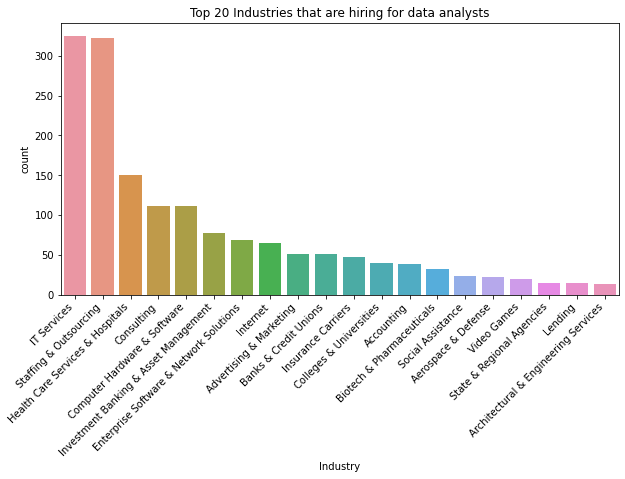

In [12]:
# count plot for the top 20 'Industry'
plt.figure(figsize=(10,5))
industry_counts = sns.countplot(x = 'Industry', data = df_cat, order = df_cat['Industry'].value_counts().head(20).index)
industry_counts = industry_counts.set_xticklabels(industry_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.title('Top 20 Industries that are hiring for data analysts')
plt.show()

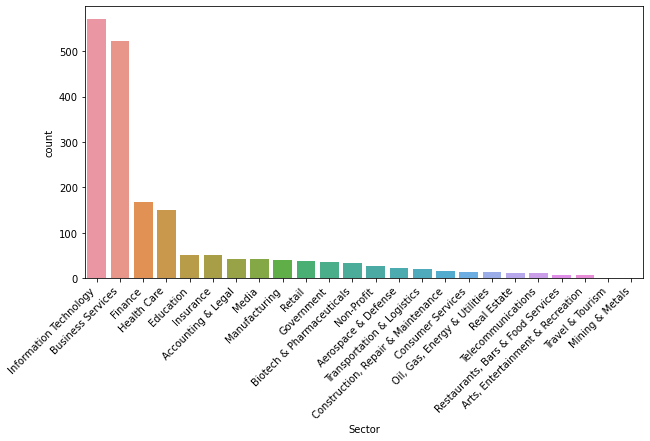

In [13]:
# count plot for 'Sector'
plt.figure(figsize=(10,5))
sector_counts = sns.countplot(x = 'Sector', data = df_cat, order = df_cat['Sector'].value_counts().index)
sector_counts = sector_counts.set_xticklabels(sector_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

Similar to the count plot of Industry, the count plot of Sector shows that IT is the number 1 sector/industry hiring data analysts. Some other top industries/sectors that hire data analysts include staffing & outsourcing, health care,consulting, business services, finance, education, and more.

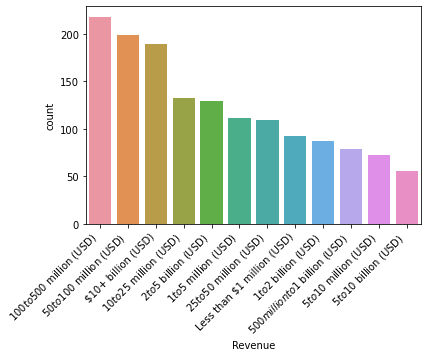

In [14]:
# count plot for 'Revenue'
revenue_counts = sns.countplot(x = 'Revenue', data = df_cat, order = df_cat['Revenue'].value_counts().index)
revenue_counts = revenue_counts.set_xticklabels(revenue_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

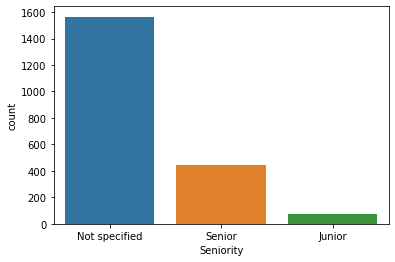

In [15]:
# count plot for 'Seniority'
sr_counts = sns.countplot(x = 'Seniority', data = df_cat, order = df_cat['Seniority'].value_counts().index)
plt.show()

### 2.2. DATA RELATIONSHIPS

#### 2.2.1. Numeric features against salaries

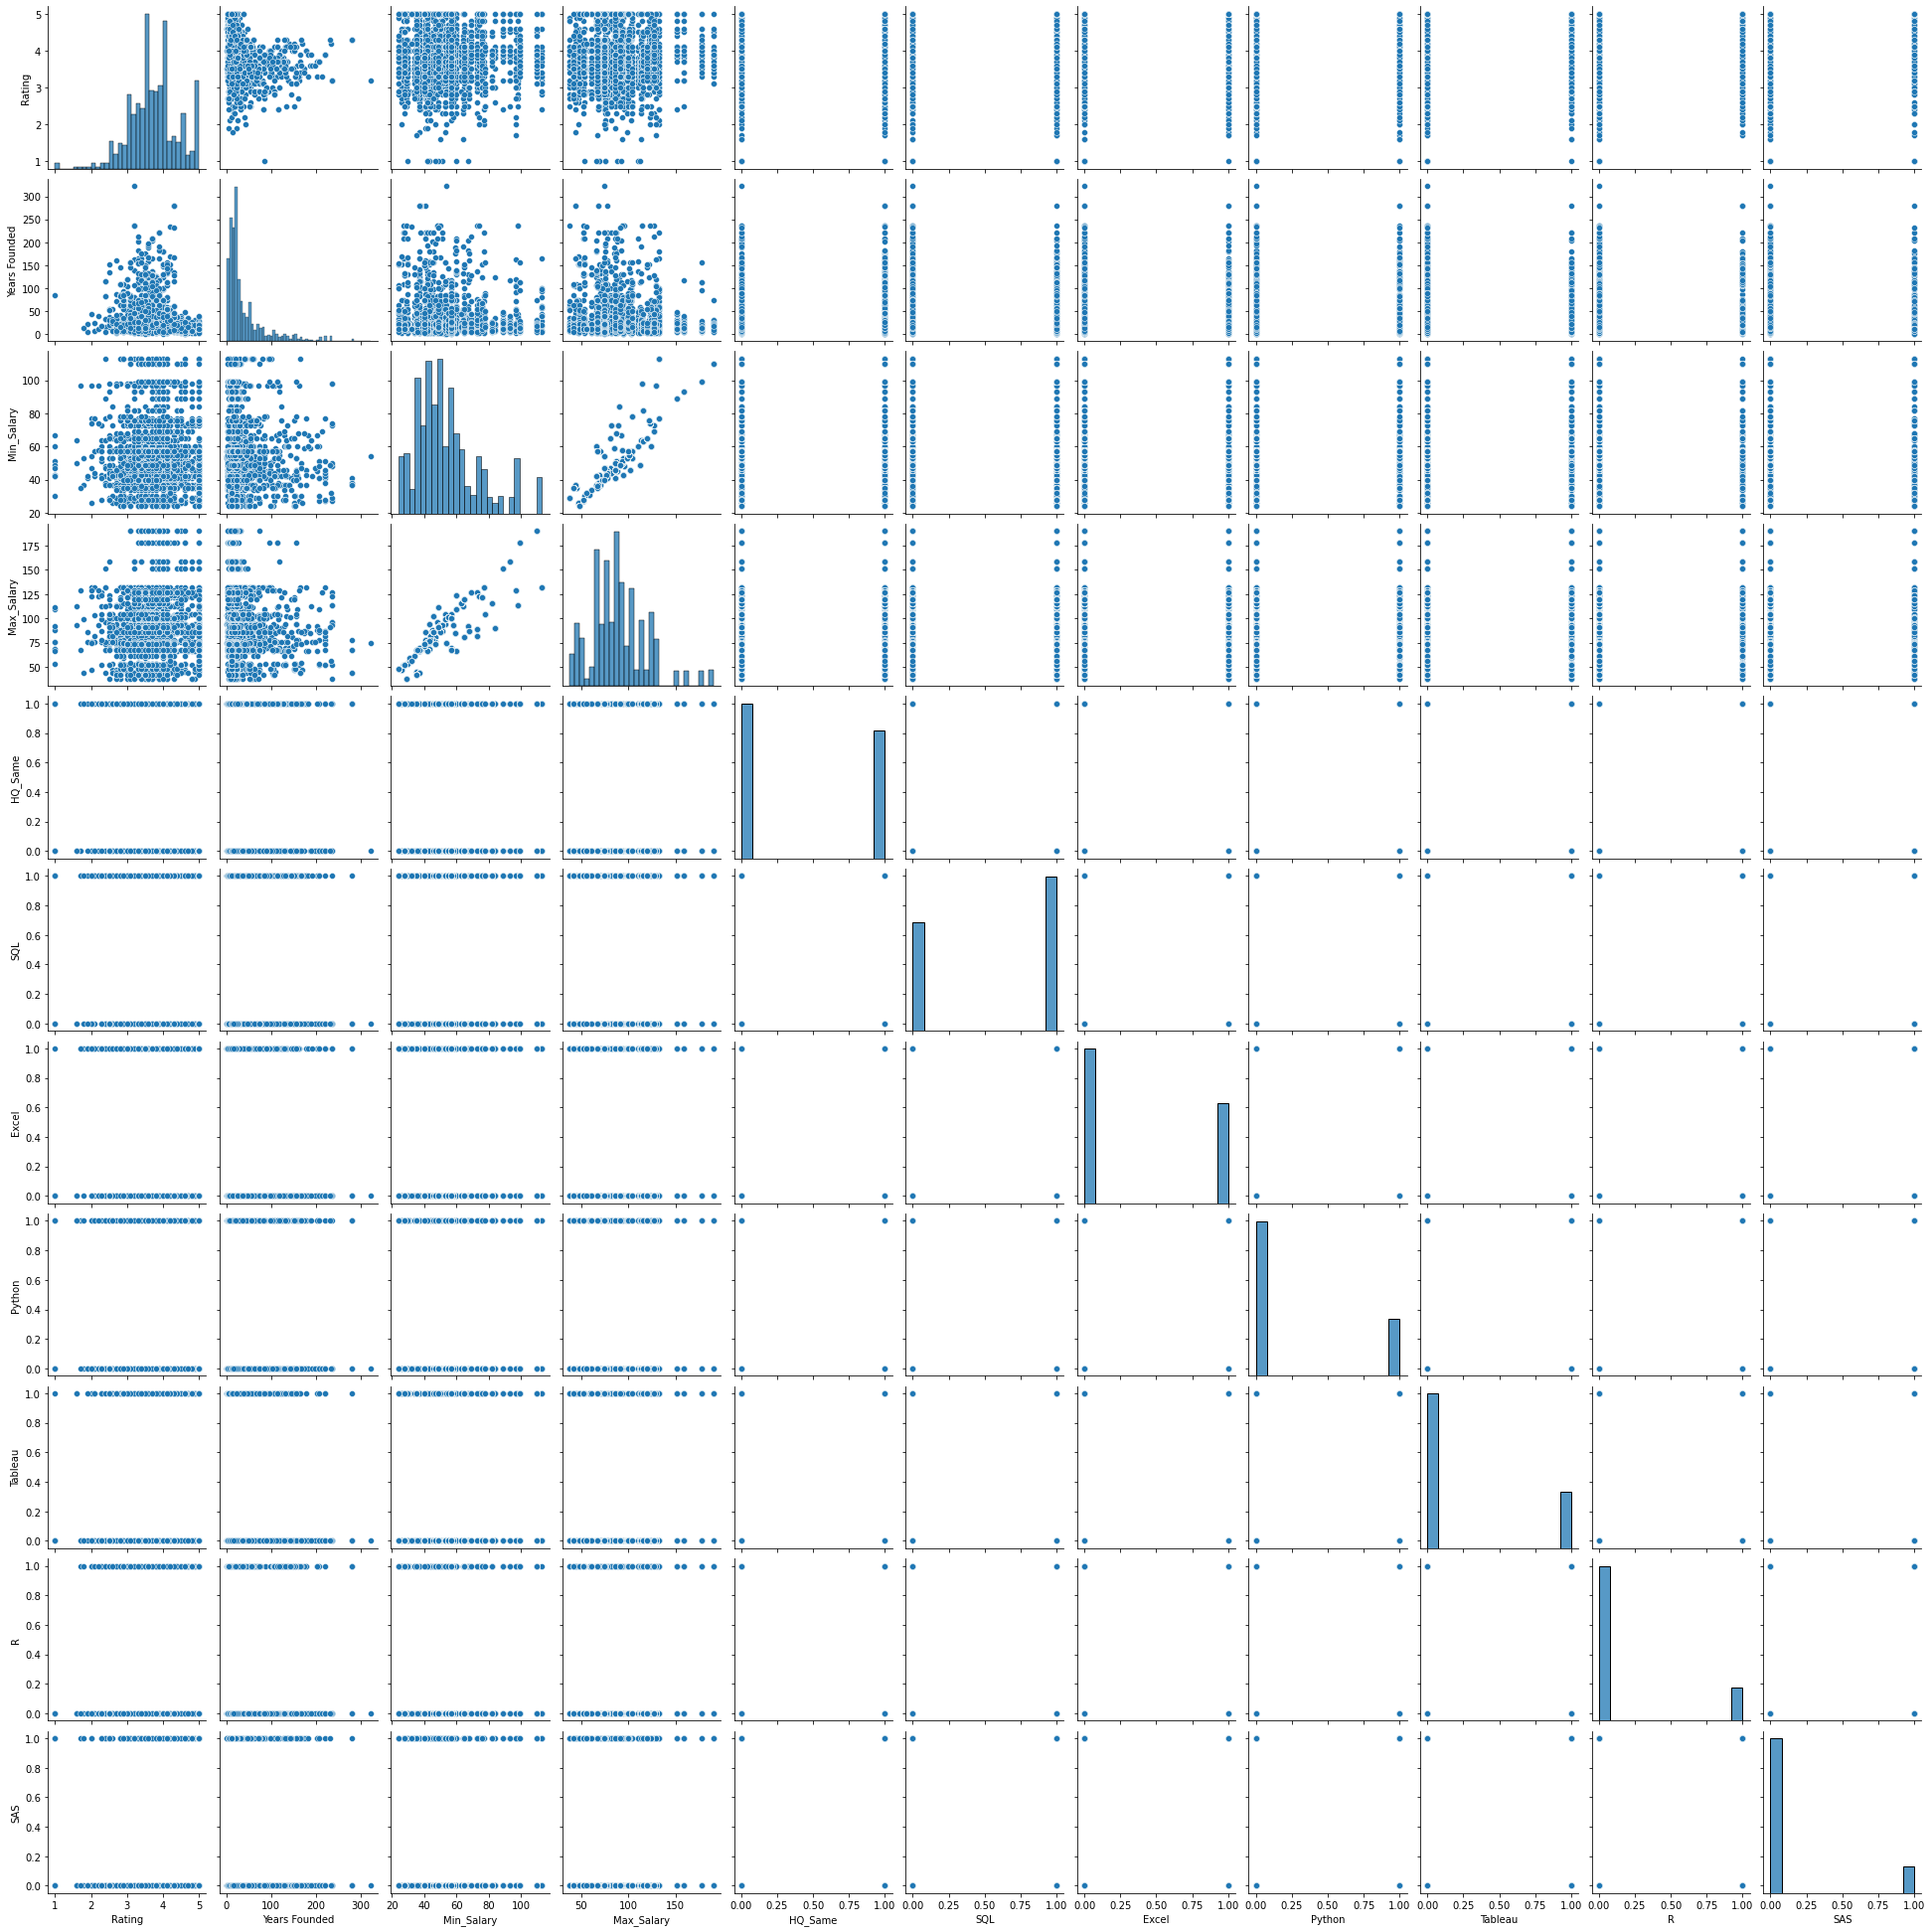

In [16]:
_ = sns.pairplot(data = jobs)
plt.show()

While there are some scatter plots above that are worth taking a look at, there are many others that are not especially helpful in understanding the relationships between particular features. For example, the scatter plots that have HQ_Same and any skills involved would barely give us any useful infomation becuase those features are essentially catergorical even though their variables have numeric values. 

Let's take only the real numeric features this time and plot the pairplot again.

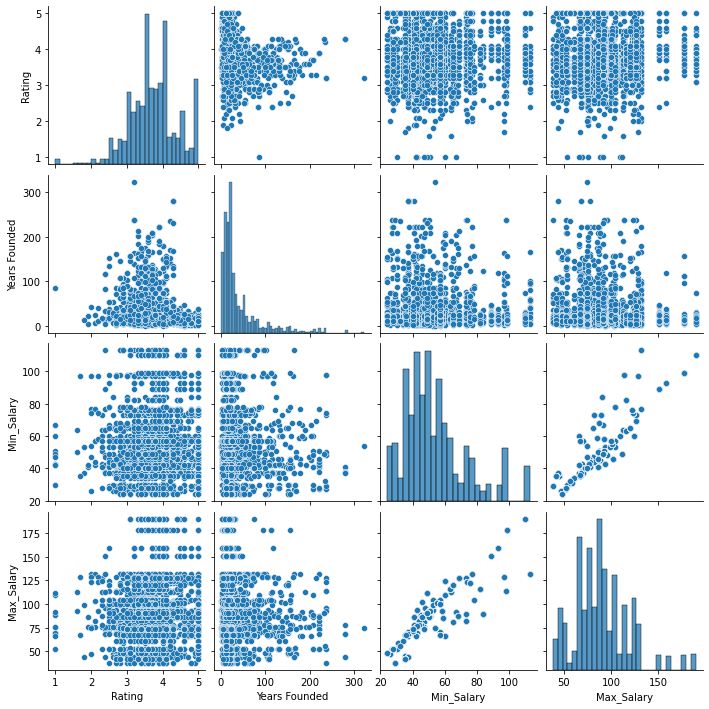

In [17]:
df_numeric = jobs[['Rating','Years Founded','Min_Salary','Max_Salary']].copy()
_ = sns.pairplot(df_numeric)
plt.show()

Not surprisingly, there seems to be a strong linear correlation between Min_Salary and Max_Salary. However, the other scatter plots are more inscrutable.

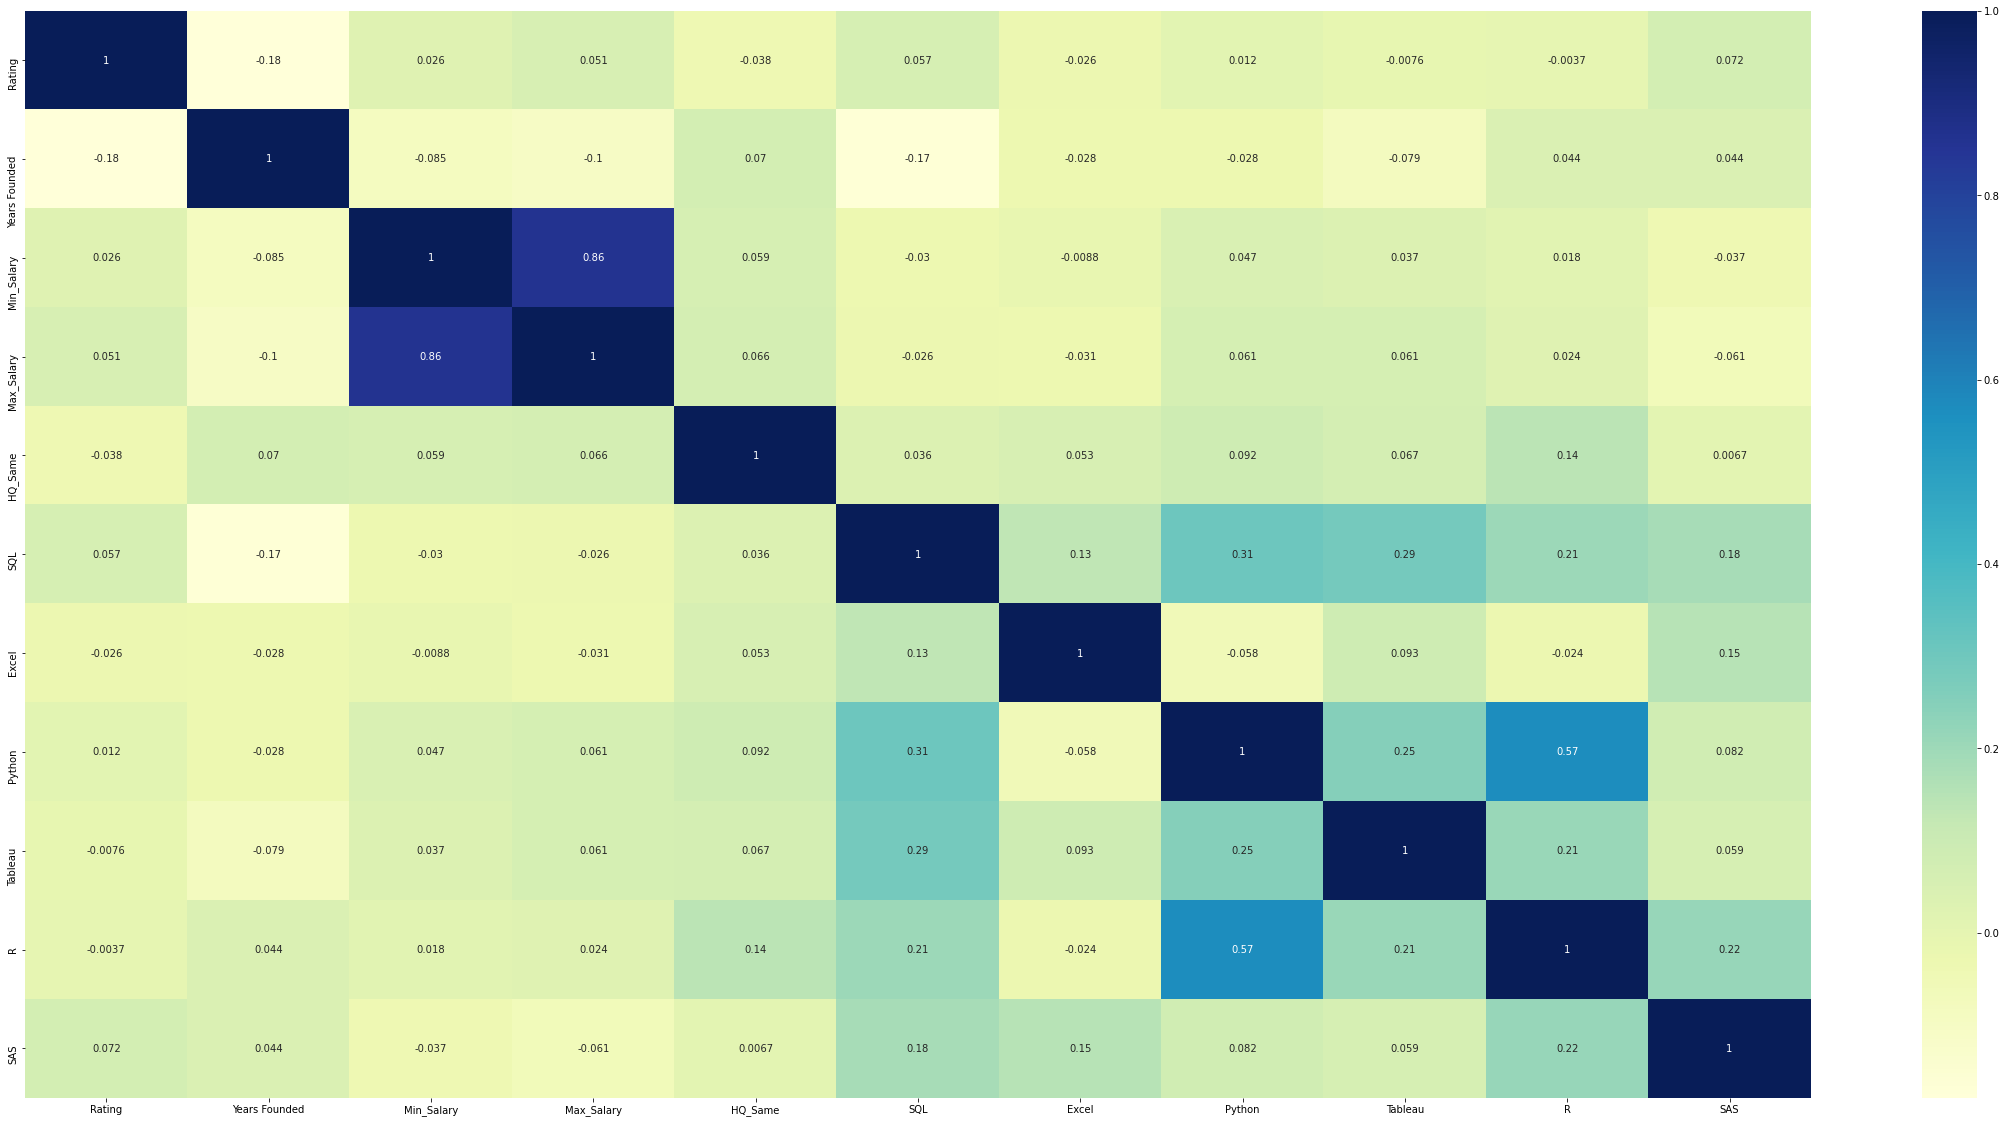

In [18]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))
sns.heatmap(jobs.corr(),cmap = 'YlGnBu',annot = True) # annotate the graph

Besides the strong positive linear correlation between Min_Salary and Max_Salary we mentioned above, there also seem to be a correlation between Python and R.

#### 2.2.2. Categorical features against salaries

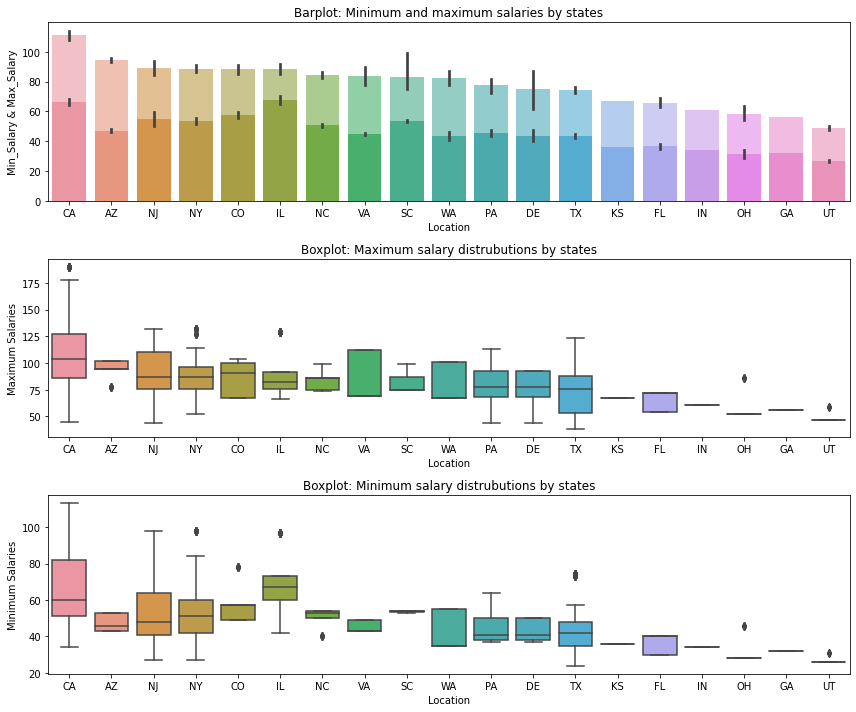

In [19]:
# salaries by locations
df = jobs.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)

figs, axs = plt.subplots(3,1,figsize=(12,10))
plt.subplot(3,1,1)
sns.barplot(x = 'Location', y = 'Min_Salary', data = jobs, order = df.index)
sns.barplot(x = 'Location', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
plt.title('Barplot: Minimum and maximum salaries by states')
plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(3,1,2)
sns.boxplot(x = 'Location', y = 'Max_Salary', data = jobs, order = df.index)
plt.title('Boxplot: Maximum salary distrubutions by states')
plt.ylabel('Maximum Salaries')

plt.subplot(3,1,3)
sns.boxplot(x = 'Location', y = 'Min_Salary', data = jobs, order = df.index)
plt.title('Boxplot: Minimum salary distrubutions by states')
plt.ylabel('Minimum Salaries')

plt.tight_layout()
plt.show()

For Data analyst roles, 
- Califonia has the highest maximun salaries and the second highest minimum salaries. CA's salaries also have the largest variation.
- Illinois has the highest minimum salaries.
- Delaware has the largest variances in its salaries.
- Utah has both the lowest maximun salaries and the lowest minimum salaries among all states.

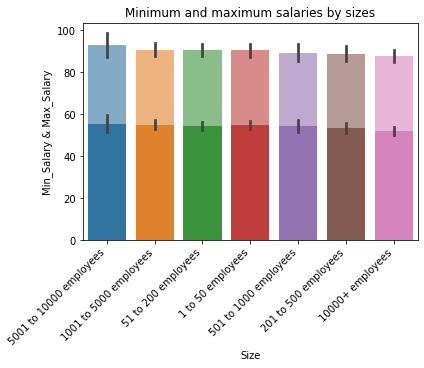

In [20]:
# salaries by sizes
df = jobs.groupby('Size')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)
_ = sns.barplot(x = 'Size', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Size', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by sizes')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

It seems like salaries depend very little on company sizes.  
However, although it does not vary much, it's interesting to see that the largest companies(with 10000+ employees) pay the least to data analysts.

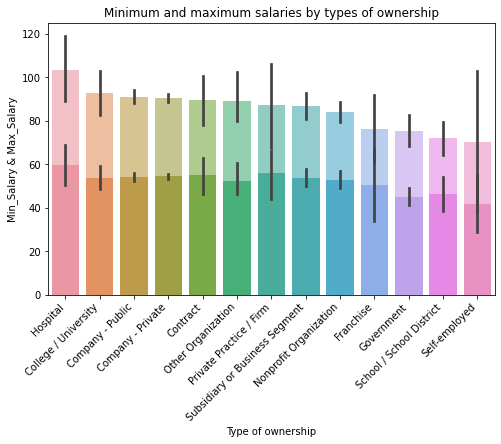

In [21]:
# salaries by type of ownerships
df = jobs.groupby('Type of ownership')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)
_ = plt.figure(figsize=(8,5))
_ = sns.barplot(x = 'Type of ownership', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Type of ownership', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by types of ownership')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

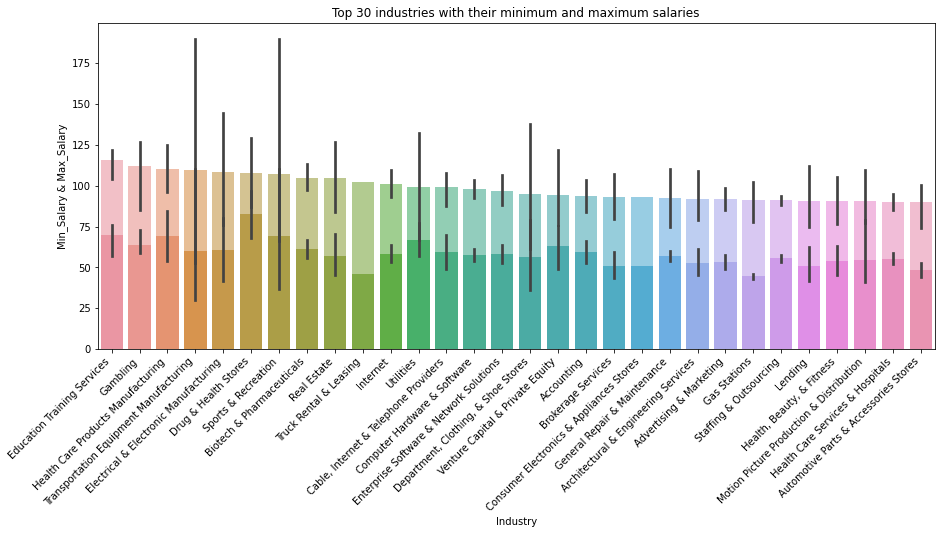

In [22]:
# salaries by industries 
df = jobs.groupby('Industry')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(30)
_ = plt.figure(figsize=(15,6))
_ = sns.barplot(x = 'Industry', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Industry', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Top 30 industries with their minimum and maximum salaries')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

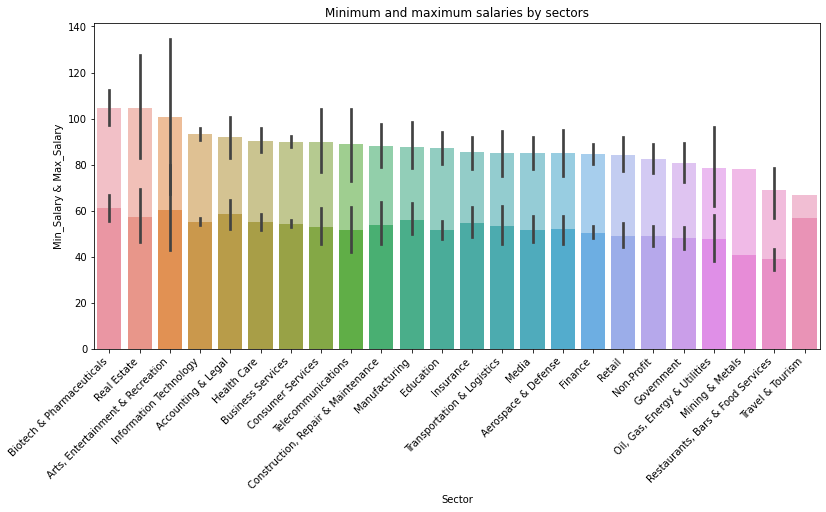

In [23]:
# salaries by sectors
df = jobs.groupby('Sector')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)
_ = plt.figure(figsize=(13,6))
_ = sns.barplot(x = 'Sector', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Sector', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by sectors')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

In [24]:
# number of industries grouped by sectors
jobs.groupby('Sector').Industry.nunique().sort_values(ascending = False)

Sector
Retail                                14
Business Services                      9
Manufacturing                          8
Finance                                8
Media                                  5
Transportation & Logistics             5
Information Technology                 4
Education                              4
Government                             3
Arts, Entertainment & Recreation       3
Restaurants, Bars & Food Services      3
Oil, Gas, Energy & Utilities           3
Construction, Repair & Maintenance     3
Consumer Services                      2
Accounting & Legal                     2
Insurance                              2
Non-Profit                             2
Telecommunications                     2
Health Care                            1
Mining & Metals                        1
Real Estate                            1
Biotech & Pharmaceuticals              1
Aerospace & Defense                    1
Travel & Tourism                       1
Name: Ind

In [25]:
jobs.groupby('Industry').Sector.nunique().sort_values(ascending = False).head(5)

Industry
Wholesale                              1
Video Games                            1
Convenience Stores & Truck Stops       1
Department, Clothing, & Shoe Stores    1
Drug & Health Stores                   1
Name: Sector, dtype: int64

We can see that every sector contains one or more than one industries, but each industries only belongs to one sector.

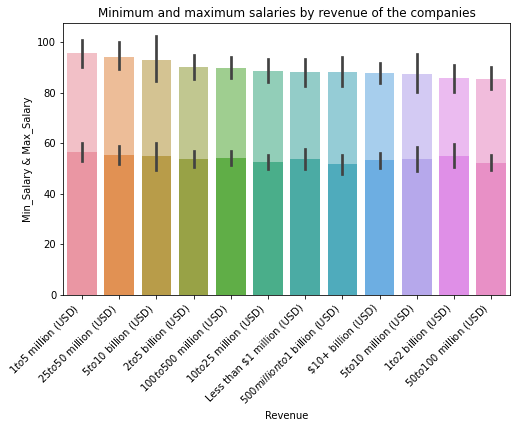

In [26]:
# salaries by type of revenues
df = jobs.groupby('Revenue')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)
_ = plt.figure(figsize=(8,5))
_ = sns.barplot(x = 'Revenue', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Revenue', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by revenue of the companies')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

There doesn't seem to be a clear pattern in salaries when grouped by revenues.

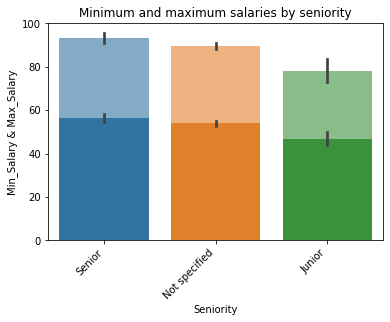

In [27]:
# salaries by seniorites
df = jobs.groupby('Seniority')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)
_ = sns.barplot(x = 'Seniority', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Seniority', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by seniority')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

Not surprisingly, senior data analysts are paid slightly more than those whose titles did not specify seniority, and they are paid a lot more than junior data analysts.

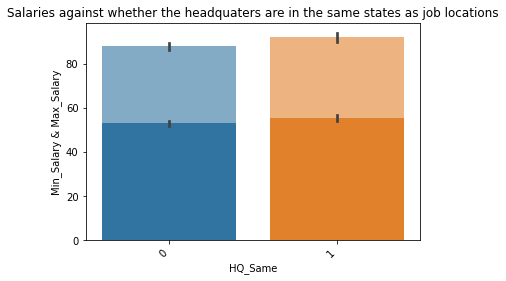

In [28]:
# salaries differ by whether the headquaters are in the same states as job locations
_ = sns.barplot(x = 'HQ_Same', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'HQ_Same', y = 'Max_Salary', data = jobs, alpha = 0.6)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Salaries against whether the headquaters are in the same states as job locations')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

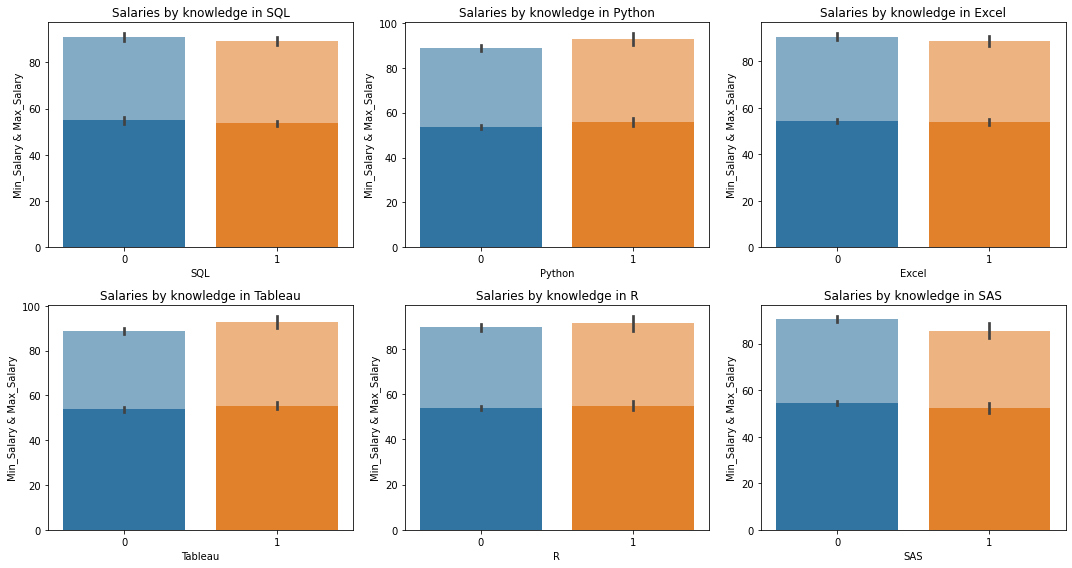

In [29]:
# salaries by skills
figs, axs = plt.subplots(2,3,figsize=(15,8))

plt.subplot(2,3,1)
_ = sns.barplot(x = 'SQL', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'SQL', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in SQL')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(2,3,2)
_ = sns.barplot(x = 'Python', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'Python', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in Python')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(2,3,3)
_ = sns.barplot(x = 'Excel', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'Excel', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in Excel')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(2,3,4)
_ = sns.barplot(x = 'Tableau', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'Tableau', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in Tableau')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(2,3,5)
_ = sns.barplot(x = 'R', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'R', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in R')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.subplot(2,3,6)
_ = sns.barplot(x = 'SAS', y = 'Min_Salary', data = jobs)
_ = sns.barplot(x = 'SAS', y = 'Max_Salary', data = jobs, alpha = 0.6)
_ = plt.title('Salaries by knowledge in SAS')
_ = plt.ylabel('Min_Salary & Max_Salary')

plt.tight_layout()
plt.show()

It seems like having a specific skill mentioned in the job desciption does not affect the salary that much.

#### 2.2.3. Word Cloud of Job Description

In [30]:
text = " ".join(description for description in jobs['Job Description'].str.lower())
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6550310 words in the combination of all review.


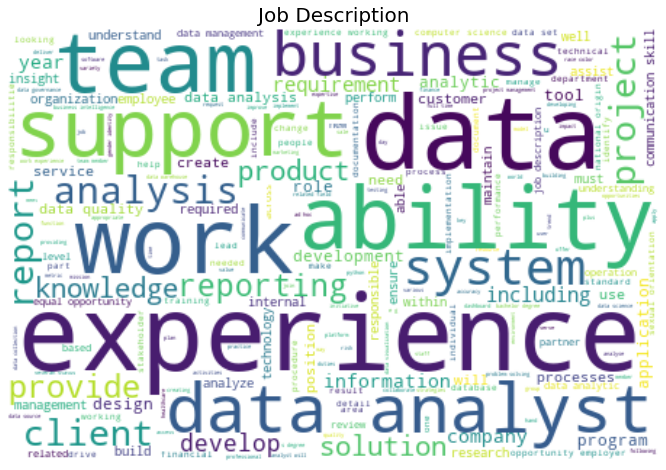

In [31]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width=450,height= 300,stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(18,8))
plt.title('Job Description',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A word cloud of Job Description has been generated. We can see that there are a few words that employers like to mention in the job descriptions for the role of data analyst, including experience, data, work, team, ability, support, business, solution, project, system, and more!

### Create a new data set with only the features we want to keep for the next step

In [32]:
# We've done using the feature 'Job Description', so we're going to drop it from our dataframe.
jobs.drop('Job Description',axis=1,inplace=True)

In [38]:
jobs['Company Name'].value_counts()

Staffigo Technical Services, LLC    58
Diverse Lynx                        22
Lorven Technologies Inc             19
Kforce                              19
Robert Half                         14
                                    ..
PriceSenz                            1
Abbott Laboratories                  1
HCL Global Systems                   1
Attentive                            1
People Tree                          1
Name: Company Name, Length: 1372, dtype: int64

There are too many unique company names, which will not help with the prediction. Therefore, I'll drop the this column.

In [39]:
jobs.drop('Company Name',axis=1,inplace=True)

Since 'Industry' and 'Sector' give similar information, keeping both of them will be redudant. I've decided to drop the feature 'Industry'.

In [41]:
jobs.drop('Industry',axis=1,inplace=True)

In [42]:
jobs.shape

(2088, 17)

## Summary

Some EDA has been done on the dataset 'jobs', which consists of 4 numeric features('Rating','Years Founded','Min_Salary', and 'Max_Salary') and 15 categorical features('Company Name','Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Seniority', 'HQ_Same', 'SQL', 'Excel', 'Python', 'Tableau', 'R', and 'SAS').  
It's hard to see any pattern that suggestes a relationship between our numeric features and salaries, even though there is a strong linear correlation between 'Min_Salary' and 'Max_Salary'. So 'Rating' and 'Years Founded' may not be very important features in subsequent modeling. However, we'll keep them for now.  
Some categorical features that seem to be important to use in subsequent modeling include 'Location', 'Type of ownership', 'Sector', and 'Seniority'.  
Categorical features that seem to be less important to use in subsequent modeling include 'Company Name', 'Size', 'Revenue', and 'HQ_Same'.  
For the skill features('SQL', 'Excel', 'Python', 'Tableau', 'R', and 'SAS'), we can't see a clear pattern of their relationshops with salaries, and we may want to do some hypothesis tests in the next step to investigate deeper.  
To prepare for the preprocessing and training step, we've dropped the features 'Job Description','Company Name' and 'Industry', and we saved the rest to a new data file.

In [43]:
# save data
datapath = 'data'
datapath_jobdata = os.path.join(datapath, 'jobs_data_step3_features.csv')
if not os.path.exists(datapath_jobdata):
    jobs.to_csv(datapath_jobdata, index=False)